#### 1.select a 1d function y=x^2

In [ ]:
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot

In [ ]:
# to define and fit a discriminator model
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
def calculationX(x):
    return x*x

# rand- uniform distribution
def generate_samples(n=100):

    X1=rand(n) - 0.5
    X2=X1*X1

    X1=X1.reshape(n,1)
    X2=X2.reshape(n,1)

    return hstack((X1,X2))

In [ ]:
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2 ,0.3 ,0.4 ,0.5]
outputs= [calculationX(x) for x in inputs]

for i in range(0,11):
    print(inputs[i]," ",outputs[i])

-0.5   0.25
-0.4   0.16000000000000003
-0.3   0.09
-0.2   0.04000000000000001
-0.1   0.010000000000000002
0   0
0.1   0.010000000000000002
0.2   0.04000000000000001
0.3   0.09
0.4   0.16000000000000003
0.5   0.25


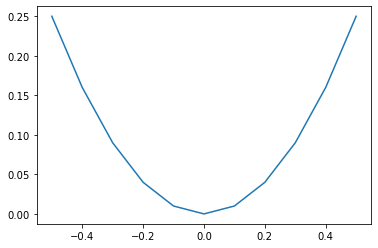

In [ ]:
pyplot.plot(inputs,outputs)

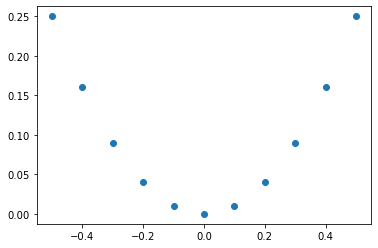

In [ ]:
pyplot.scatter(inputs,outputs)

In [ ]:
data=generate_samples()

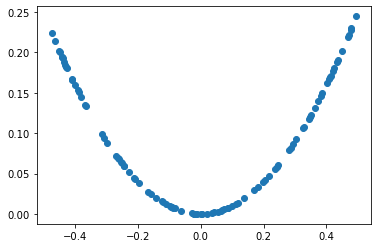

In [ ]:
pyplot.scatter(data[:,0], data[:,1])
pyplot.show()

In [ ]:
# randn -generates samples from a normal distribution
def generate_samplesN(n=100):
    X11=randn(n) - 0.5
    X22=X11*X11

    X11=X11.reshape(n,1)
    X22=X22.reshape(n,1)

    return hstack((X11,X22))

In [ ]:
data2=generate_samples()

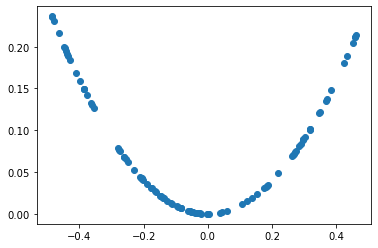

In [ ]:
pyplot.scatter(data2[:,0], data2[:,1])
pyplot.show()

### Discriminator Model

A neural network of discriminator
real inputs and other in range -1 to 1
target output for squared ones is 1

In [ ]:
#define a discriminator model
# model minimize the binary-cross-entropy loss funtion
# oiptimzer used - Adam


In [ ]:
# defining the discriminator model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [ ]:
# defining the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))

    # model compliation
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = define_discriminator()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 25)                75        
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# generate n real samples with class labels

def generate_real_samples(n):
    # generate inputs in [-0.5, 0.5]
    X1 = rand(n) - 0.5
    # generate outputs X^2
    X2 = X1 * X1

    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X = hstack((X1, X2))
    # generate class labels
    y = ones((n, 1))
    return X, y

# generate n fake samples with class labels

def generate_fake_samples(n):
    # generate inputs in [-1, 1]
    X1 = 2* rand(n) -1
    # generate outputs in [-1, 1]
    X2 = 2* rand(n) -1

    # stack arrays
    X1=X1.reshape(n,1)
    X2=X2.reshape(n,1)
    X = hstack((X1, X2))

    # generate class labels
    y = zeros((n, 1))
    return X, y


In [ ]:
# datar=generate_real_samples(n)
# pyplot.scatter(datar[:,X], datar[:,y])
# pyplot.show()

In [ ]:
# datar=generate_fake_samples(X)
# pyplot.scatter(datar[:,0], datar[:,1])
# pyplot.show()

In [ ]:
# train the discriminator model
real_acc=[]
fake_acc=[]
def train_discriminator(model, n_epochs=1000, n_batch=128):
    half_batch = int(n_batch / 2)
    # run epochs manually
    for i in range(n_epochs):
        # generate real examples
        X_real, y_real = generate_real_samples(half_batch)

        # update model
        model.train_on_batch(X_real, y_real)

        # generate fake examples
        X_fake, y_fake = generate_fake_samples(half_batch)

        # update model
        model.train_on_batch(X_fake, y_fake)

        # evaluate the model
        _, acc_real = model.evaluate(X_real, y_real, verbose=0)
        real_acc.append(acc_real)

        _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
        fake_acc.append(acc_fake)


        print(i, acc_real, acc_fake)

        # define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)

0 0.4375 0.546875
1 0.484375 0.640625
2 0.515625 0.421875
3 0.453125 0.6875
4 0.5625 0.59375
5 0.46875 0.640625
6 0.609375 0.546875
7 0.546875 0.6875
8 0.5 0.65625
9 0.453125 0.671875
10 0.59375 0.609375
11 0.515625 0.71875
12 0.5 0.625
13 0.5 0.59375
14 0.609375 0.53125
15 0.5625 0.546875
16 0.578125 0.5625
17 0.46875 0.734375
18 0.546875 0.71875
19 0.53125 0.734375
20 0.625 0.65625
21 0.59375 0.703125
22 0.59375 0.640625
23 0.5 0.765625
24 0.515625 0.640625
25 0.5625 0.625
26 0.578125 0.65625
27 0.453125 0.609375
28 0.578125 0.640625
29 0.59375 0.609375
30 0.609375 0.703125
31 0.5 0.59375
32 0.5625 0.703125
33 0.375 0.671875
34 0.546875 0.71875
35 0.5625 0.625
36 0.5625 0.640625
37 0.515625 0.671875
38 0.53125 0.640625
39 0.640625 0.5625
40 0.6875 0.75
41 0.53125 0.65625
42 0.46875 0.71875
43 0.671875 0.734375
44 0.53125 0.640625
45 0.59375 0.71875
46 0.53125 0.6875
47 0.515625 0.734375
48 0.515625 0.609375
49 0.65625 0.71875
50 0.53125 0.671875
51 0.5 0.796875
52 0.546875 0.703125
5

In [ ]:
epoch = [i for i in range(1000)]

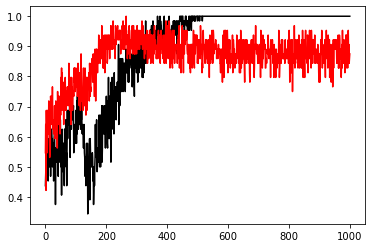

In [ ]:
pyplot.plot(epoch,real_acc,color='black')
pyplot.plot(epoch,fake_acc,color='red')
pyplot.show()

4/4 [==============================] - 0s 1ms/step
1999 0.6700000166893005 0.49000000953674316


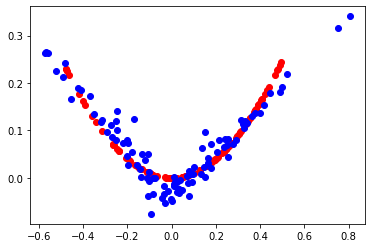

4/4 [==============================] - 0s 666us/step
3999 0.6299999952316284 0.550000011920929


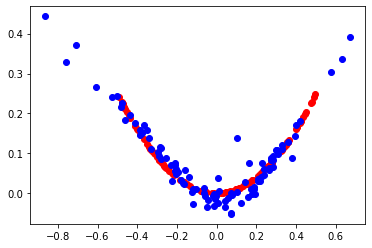

4/4 [==============================] - 0s 1ms/step
5999 0.47999998927116394 0.5699999928474426


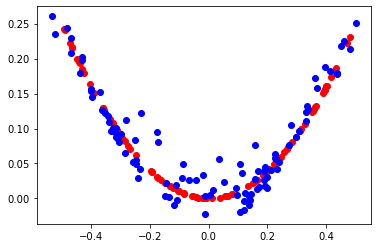

4/4 [==============================] - 0s 669us/step
7999 0.5799999833106995 0.49000000953674316


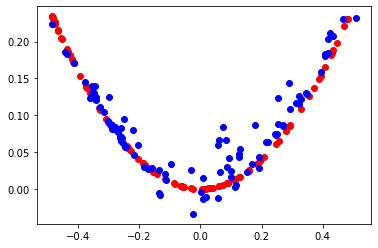

4/4 [==============================] - 0s 1ms/step
9999 0.46000000834465027 0.550000011920929


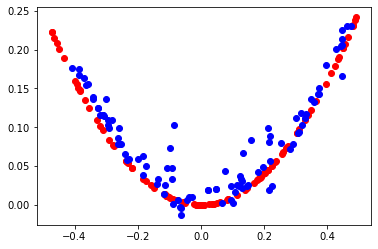

In [ ]:
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

#generate n real samples with class labels
def generate_real_samples(n):
    # generate inputs in [-0.5, 0.5]
    X1 = rand(n) - 0.5
    # generate outputs X^2
    X2 = X1 * X1
    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X = hstack((X1, X2))
    # generate class labels
    y = ones((n, 1))
    return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    # generate points in the latent space
    x_input = randn(latent_dim * n)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n, latent_dim)
    return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    # predict outputs
    X = generator.predict(x_input)
    # create class labels
    y = zeros((n, 1))
    return X, y

# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    # prepare real samples
    x_real, y_real = generate_real_samples(n)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
    pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
    pyplot.show()

# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        x_real, y_real = generate_real_samples(half_batch)
        # prepare fake examples
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        # update discriminator
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        # prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_batch)
        # create inverted labels for the fake samples
        y_gan = ones((n_batch, 1))
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan)
        # evaluate the model every n_eval epochs
        if (i+1) % n_eval == 0:
            summarize_performance(i, g_model, d_model, latent_dim)

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)